<a href="https://colab.research.google.com/github/zackives/upenn-cis-2450/blob/main/14_Module_3_Notebook_II_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finding Clusters



## Autograder setup

In [64]:
#PLEASE ENSURE YOUR PENN-ID IS ENTERED CORRECTLY. IF NOT, THE AUTOGRADER WON'T KNOW WHO
#TO ASSIGN POINTS TO YOU IN OUR BACKEND
STUDENT_ID = 99999999 # YOUR PENN-ID GOES HERE AS AN INTEGER##PLEASE ENSURE YOUR PENN-ID IS ENTERED CORRECTLY. IF NOT, THE AUTOGRADER WON'T KNOW WHO

In [65]:
%%writefile notebook-config.yaml

grader_api_url: 'https://23whrwph9h.execute-api.us-east-1.amazonaws.com/default/Grader23'
grader_api_key: 'flfkE736fA6Z8GxMDJe2q8Kfk8UDqjsG3GVqOFOa'

Overwriting notebook-config.yaml


In [66]:
%set_env HW_ID=cis2450_fall24_HW9

env: HW_ID=cis2450_fall24_HW9


In [67]:
!pip3 install penngrader-client

In [68]:
import os
from penngrader.grader import *

grader = PennGrader('notebook-config.yaml', os.environ['HW_ID'], STUDENT_ID, STUDENT_ID)

PennGrader initialized with Student ID: 99999999

Make sure this correct or we will not be able to store your grade


## Looking at Glass... ... Again

Recall the glass dataset from the PCA notebook.

In [69]:
# Glass data from https://archive.ics.uci.edu/ml/machine-learning-databases/glass/

In [70]:
!wget https://archive.ics.uci.edu/static/public/42/glass+identification.zip

--2024-10-22 14:15:52--  https://archive.ics.uci.edu/static/public/42/glass+identification.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘glass+identification.zip.1’

glass+identificatio     [ <=>                ]   6.23K  --.-KB/s    in 0s      

2024-10-22 14:15:55 (93.3 MB/s) - ‘glass+identification.zip.1’ saved [6380]



In [71]:
!unzip glass+identification.zip

Archive:  glass+identification.zip
replace Index? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [72]:
# Load into a dataframe, with the header in row 0
import pandas as pd

glass_df = pd.read_csv('glass.data',header=None,names=['ID','RefractiveIndex','Na','Mg','Al','Si','K','Ca','Ba','Fe','Label'])

glass_df

,ID,RefractiveIndex,Na,Mg,Al,Si,K,Ca,Ba,Fe,Label
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [73]:
glass_df.set_index('ID')
glass_types_df = glass_df[['Label']]

# We don't really need these
glass_df = glass_df.drop(columns=['ID', 'Label'])

display(glass_df)
display(glass_types_df)

,RefractiveIndex,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


,Label
0,1
1,1
2,1
3,1
4,1
...,...
209,7
210,7
211,7
212,7


## Unsupervised Machine Learning!

We typically set up machine learning problems as follows.

1. Convert from categorical and other values into numeric values
2. Convert from dataframes to arrays
3. Separate out any classes / labels (like glass type)

We will call the *input data*  $X$ and the *labels* $y$.

In [74]:
# Set up the problem

X = glass_df.to_numpy()
y = glass_types_df.to_numpy()

## Running PCA

We'll use, for the first time, a standard sckikit-learn 'flow': create a model, `fit` it, and `transform` the data.

In [75]:
from sklearn.preprocessing import StandardScaler

# Standardizing the features based on unit variance
X = StandardScaler().fit_transform(X)

print (X.shape)
print(X)

(214, 9)
[[ 0.87286765  0.28495326  1.25463857 ... -0.14576634 -0.35287683
  -0.5864509 ]
 [-0.24933347  0.59181718  0.63616803 ... -0.79373376 -0.35287683
  -0.5864509 ]
 [-0.72131806  0.14993314  0.60142249 ... -0.82894938 -0.35287683
  -0.5864509 ]
 ...
 [ 0.75404635  1.16872135 -1.86551055 ... -0.36410319  2.95320036
  -0.5864509 ]
 [-0.61239854  1.19327046 -1.86551055 ... -0.33593069  2.81208731
  -0.5864509 ]
 [-0.41436305  1.00915211 -1.86551055 ... -0.23732695  3.01367739
  -0.5864509 ]]


In [76]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
X_embedded = pca.fit_transform(X)[:,1:3]

## Clustering Algorithm

### The Algorithm, in Full Detail

Let's start with the basic algorithm.  We'll split it into three components:
1. The clustering coefficient or `error` function -- how far away are points?
2. The function to get the most appropriate cluster for a point, `get_nearest`.
3. The main K-Means algorithm.

For this version we will initialize with randomly chosen points in the dataset, then iteratively recompute until we reach convergence (which is detected when every point remains in its current cluster).

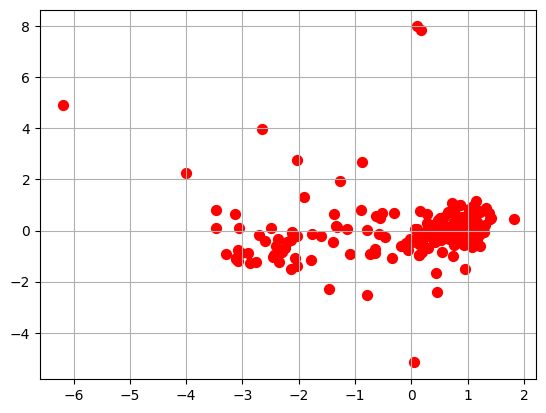

Initialized centroids to: 
[[-0.88407793  2.68208303]
 [ 0.90287584 -0.17636245]]
Iteration 1
Cluster 0
[-2.29871686  2.1500043 ]
Cluster 1
[ 0.21110665 -0.19744937]
Iteration 2
Cluster 0
[-2.54168819  1.2068242 ]
Cluster 1
[ 0.35151007 -0.16690122]
Iteration 3
Cluster 0
[-2.39128702  0.38277522]
Cluster 1
[ 0.63673323 -0.10192239]
Iteration 4
Cluster 0
[-2.26237358  0.26005129]
Cluster 1
[ 0.70785922 -0.08136574]
Iteration 5
Cluster 0
[-2.28126396  0.10618249]
Cluster 1
[ 0.71376971 -0.03322274]
Iteration 6
Cluster 0
[-2.32895823 -0.05143773]
Cluster 1
[0.71004824 0.01568223]
Iteration 7
Cluster 0
[-2.32877047 -0.10201484]
Cluster 1
[0.709991   0.03110209]
Iteration 8
Cluster 0
[-2.35825399 -0.15883317]
Cluster 1
[0.70032997 0.04716864]
Iteration 9
Converged!


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [77]:
from random import randint
from scipy.spatial import distance
import numpy as np
import matplotlib.pyplot as plt

def error(x,c):
  """
  Error (distance, clustering coefficient) between a point x
  and the centroid c.  We are using Euclidean distance, which
  can also be thought of as the sum of the squared error.
  """
  err = np.linalg.norm(x - c)

  return err

def get_nearest(c_list, x):
  nearest = -1
  nearest_error = np.infty
  for i, v in enumerate(c_list):
    if error(x, v) < nearest_error:
      nearest_error = error(x, v)
      nearest = i
  return nearest

def kmeans(X, k, show):
  """
  Simple k-means algorithm
  """
  # Initialize the centroids to random points
  # in the data
  centroids = np.zeros((k,2))
  cluster_assignments = [0 for i in range(len(X))]
  for i in range(0, k):
    centroids[i] = X[randint(0, X.shape[0])]

  if show:
    print('Initialized centroids to: ')
    print(centroids)

  iteration = 1
  changed = True
  while changed:
    if show:
      print ('Iteration %d'%iteration)
      iteration = iteration + 1

    # Nothing happened in this iteration, by default
    changed = False
    # Assign points to clusters
    for i,x in enumerate(X):
      nearest = get_nearest(centroids, x)
      # We changed a cluster mapping!
      if nearest != cluster_assignments[i]:
        changed = True
      cluster_assignments[i] = nearest

    if changed:
      # Recompute clusters
      for i in range(len(centroids)):
        points = [j for j,v in enumerate(cluster_assignments) if v == i]
        if show:
          print ('Cluster %d'%i)
        X_subset = np.array([[X[i,0],X[i,1]] for i in points])

        if len(X_subset):
          centroids[i][0] = np.sum(X_subset[:, 0]) / len(points)
          centroids[i][1] = np.sum(X_subset[:, 1]) / len(points)
          print (centroids[i])
    elif show:
      print('Converged!')

  return (centroids, np.array(cluster_assignments))


k = 2
plt.scatter(X_embedded[:,0], X_embedded[:,1], c='red', marker='o', s=50)
plt.grid()
plt.show()
centroids, assignments = kmeans(X_embedded, k, True)

assignments

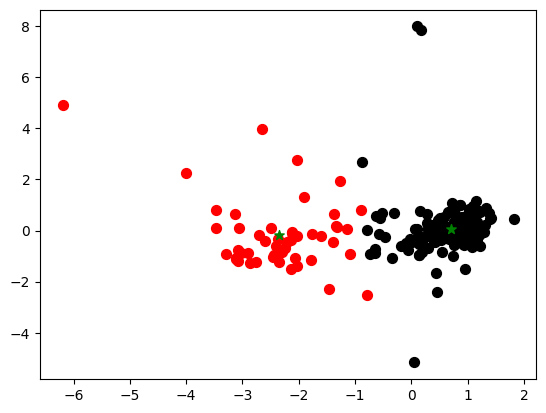

In [78]:
# Plotting along with the Centroids
clust0 = np.array([x for i, x in enumerate(X_embedded) if assignments[i] == 0])
clust1 = np.array([x for i, x in enumerate(X_embedded) if assignments[i] == 1])

plt.scatter(clust0[:,0], clust0[:,1], c='red', marker='o', s=50)
plt.scatter(clust1[:,0], clust1[:,1], c='black', marker='o', s=50)
plt.scatter(centroids[:,0], centroids[:,1], marker='*', s=50, c='g')

In [145]:
from sklearn.cluster import KMeans

km = KMeans(2, init='random', n_init=1, max_iter=300, random_state=0)
km.fit(X_embedded)

KMeans(init='random', n_clusters=2, n_init=1, random_state=0)

In [146]:
km.cluster_centers_

array([[-2.35825399, -0.15883317],
       [ 0.70032997,  0.04716864]])

In [147]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

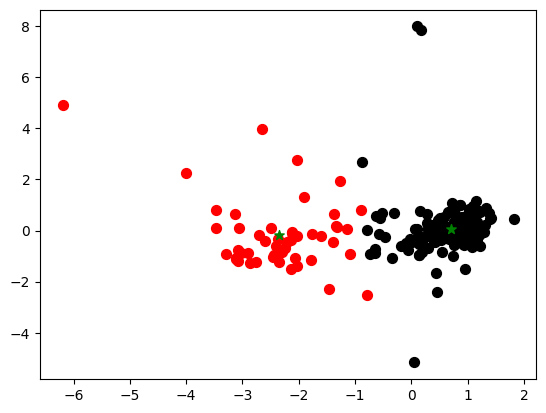

In [148]:
# Plotting along with the Centroids
clust0 = np.array([x for i, x in enumerate(X_embedded) if km.labels_[i] == 0])
clust1 = np.array([x for i, x in enumerate(X_embedded) if km.labels_[i] == 1])

plt.scatter(clust0[:,0], clust0[:,1], c='red', marker='o', s=50)
plt.scatter(clust1[:,0], clust1[:,1], c='black', marker='o', s=50)
plt.scatter(centroids[:,0], centroids[:,1], marker='*', s=50, c='g')

### k-Means in SQL

For this one we'll use the college dataset from Kaggle.  Here we have both private and public universities, as well as many statistics.

The hope is that we can find 2 natural clusters.  Let's see!

In [83]:
!pip install sparkmagic

In [84]:
%load_ext sparkmagic.magics

The sparkmagic.magics extension is already loaded. To reload it, use:
  %reload_ext sparkmagic.magics


In [ ]:
%spark add -s my_session -l python -u http://ec2-34-234-215-55.compute-1.amazonaws.com -a cis545-livy -p passme -t Basic_Access


In [122]:
%%spark

import pandas as pd

# Sample data
km_data = pd.DataFrame(pd.read_csv('https://www.cis.upenn.edu/~zives/college-data.csv'))
km_data['private'] = km_data['private'] == 'Yes'

km_data.info()


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   private      777 non-null    bool   
 1   apps         777 non-null    int64  
 2   accept       777 non-null    int64  
 3   enroll       777 non-null    int64  
 4   top10perc    777 non-null    int64  
 5   top25perc    777 non-null    int64  
 6   f_undergrad  777 non-null    int64  
 7   p_undergrad  777 non-null    int64  
 8   outstate     777 non-null    int64  
 9   room_board   777 non-null    int64  
 10  books        777 non-null    int64  
 11  personal     777 non-null    int64  
 12  phd          777 non-null    int64  
 13  terminal     777 non-null    int64  
 14  s_f_ratio    777 non-null    float64
 15  perc_alumni  777 non-null    int64  
 16  expend       777 non-null    int64  
 17  grad_rate    777 non-null    int64  
dtypes: bool(1), float64(1), int64(16)
memory usage: 10

In [128]:
%%spark
from sklearn.preprocessing import StandardScaler
from pyspark.sql.types import *

km_schema = StructType([StructField("index", IntegerType(), True),
                        StructField("private", FloatType(), True),
                        StructField("apps", FloatType(), True),
                        StructField("accept", FloatType(), True),
                        StructField("enroll", FloatType(), True),
                        StructField("top10perc", FloatType(), True),
                        StructField("top25perc", FloatType(), True),
                        StructField("f_undergrad", FloatType(), True),
                        StructField("p_undergrad", FloatType(), True),
                        StructField("outstate", FloatType(), True),
                        StructField("room_board", FloatType(), True),
                        StructField("books", FloatType(), True),
                        StructField("personal", FloatType(), True),
                        StructField("phd", FloatType(), True),
                        StructField("terminal", FloatType(), True),
                        StructField("s_f_ratio", FloatType(), True),
                        StructField("perc_alumni", FloatType(), True),
                        StructField("expend", FloatType(), True),
                        StructField("grad_rate", FloatType(), True)
                        ])

# Standardizing the features based on unit variance
km_data_2 = StandardScaler().fit_transform(km_data)
km_data_2_df = pd.DataFrame(km_data_2)
km_data_2_df.reset_index(inplace=True)
#km_data_2_df.info()
#print(km_data_2_df)
km_data_2_df.info()

km_data_sdf = spark.createDataFrame(km_data_2_df, km_schema)
km_data_sdf.show()

#km_data.info()


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   777 non-null    int64  
 1   0       777 non-null    float64
 2   1       777 non-null    float64
 3   2       777 non-null    float64
 4   3       777 non-null    float64
 5   4       777 non-null    float64
 6   5       777 non-null    float64
 7   6       777 non-null    float64
 8   7       777 non-null    float64
 9   8       777 non-null    float64
 10  9       777 non-null    float64
 11  10      777 non-null    float64
 12  11      777 non-null    float64
 13  12      777 non-null    float64
 14  13      777 non-null    float64
 15  14      777 non-null    float64
 16  15      777 non-null    float64
 17  16      777 non-null    float64
 18  17      777 non-null    float64
dtypes: float64(18), int64(1)
memory usage: 115.5 KB
+-----+----------+-----------+-------------+-----------+---------

In [143]:
%%spark

km_data_sdf.schema

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

StructType([StructField('index', IntegerType(), True), StructField('private', FloatType(), True), StructField('apps', FloatType(), True), StructField('accept', FloatType(), True), StructField('enroll', FloatType(), True), StructField('top10perc', FloatType(), True), StructField('top25perc', FloatType(), True), StructField('f_undergrad', FloatType(), True), StructField('p_undergrad', FloatType(), True), StructField('outstate', FloatType(), True), StructField('room_board', FloatType(), True), StructField('books', FloatType(), True), StructField('personal', FloatType(), True), StructField('phd', FloatType(), True), StructField('terminal', FloatType(), True), StructField('s_f_ratio', FloatType(), True), StructField('perc_alumni', FloatType(), True), StructField('expend', FloatType(), True), StructField('grad_rate', FloatType(), True)])

In [130]:
%%spark

k = 2
km_data_sdf.createOrReplaceTempView('km_data')

def initialize():
  ######################
  ## Initialize clusters.  It's better to do this randomly, but we'll use the
  ## first k=2 rows
  km_cluster_centroids_sdf = spark.sql("""
            SELECT index as cluster_id,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
            FROM km_data TABLESAMPLE (""" + str(k) + ' ROWS)')

  km_cluster_centroids_sdf.show()
  km_cluster_centroids_sdf.createOrReplaceTempView('km_cluster_centroids')
  return km_cluster_centroids_sdf

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [131]:
%%spark

def assign_clusters():
      # Distance between each point & each centroid
    km_data_to_cluster_dist_sdf =\
      spark.sql("""
                SELECT c.cluster_id,k.index,(pow(c.apps - k.apps, 2)+
                                              pow(c.accept - k.accept, 2)+
                                              pow(c.enroll - k.enroll, 2)+
                                              pow(c.top10perc - k.top10perc, 2)+
                                              pow(c.top25perc - k.top25perc, 2)+
                                              pow(c.f_undergrad - k.f_undergrad, 2)+
                                              pow(c.p_undergrad - k.p_undergrad, 2)+
                                              pow(c.outstate - k.outstate, 2)+
                                              pow(c.room_board - k.room_board, 2)+
                                              pow(c.personal - k.personal, 2)+
                                              pow(c.phd - k.phd, 2)+
                                              pow(c.terminal - k.terminal, 2)+
                                              pow(c.s_f_ratio - k.s_f_ratio, 2)+
                                              pow(c.perc_alumni - k.perc_alumni, 2)+
                                              pow(c.expend - k.expend, 2)+
                                              pow(c.grad_rate - k.grad_rate, 2)
                ) as dist
                FROM km_cluster_centroids c CROSS JOIN km_data k
                """)
    km_data_to_cluster_dist_sdf.createOrReplaceTempView('km_data_to_cluster_dist')

    # SparkSQL is very limited in subqueries.  We want for each index,
    # the cluster_id which minimizes the cluster distance.  We do two steps for
    # each data item: (1) find the shortest distance to ANY cluster ID,
    # (2) find the cluster ID whose distance equals the shortest distance.
    km_data_to_cluster_best_dist_sdf = spark.sql('''
              SELECT index,min(dist) as dist
              FROM km_data_to_cluster_dist
              GROUP BY index''')
    km_data_to_cluster_best_dist_sdf.createOrReplaceTempView('km_data_to_cluster_best_dist')

    km_data_to_cluster_sdf = spark.sql('''
              SELECT kd.index, kd.cluster_id
              FROM km_data_to_cluster_dist kd JOIN km_data_to_cluster_best_dist kb
                ON kd.index = kb.index
              WHERE kd.dist = kb.dist''')
    km_data_to_cluster_sdf.createOrReplaceTempView('km_data_to_cluster')
    km_data_to_cluster_sdf.show()
    return km_data_to_cluster_sdf


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [132]:
%%spark
def compute_centroids():
  km_clusters_sdf = spark.sql('''
            SELECT cluster_id,AVG(apps) AS apps,AVG(accept) AS accept,
               AVG(enroll) AS enroll,AVG(top10perc) AS top10perc,
               AVG(top25perc) AS top25perc,AVG(f_undergrad) AS f_undergrad,
               AVG(p_undergrad) AS p_undergrad,AVG(outstate) AS outstate,
               AVG(room_board) AS room_board,AVG(books) AS books,
               AVG(personal) AS personal,AVG(phd) AS phd,
               AVG(terminal) AS terminal,AVG(s_f_ratio) AS s_f_ratio,
               AVG(perc_alumni) AS perc_alumni,AVG(expend) AS expend,
               AVG(grad_rate) AS grad_rate
            FROM km_data_to_cluster kc JOIN km_data kd ON kc.index = kd.index
            GROUP BY kc.cluster_id
            ''')
  km_clusters_sdf.createOrReplaceTempView('km_cluster_centroids')
  km_clusters_sdf.show()
  return km_clusters_sdf

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [133]:
%%spark

max_iter = 1
print('Initial data:')
spark.sql('select * from km_data').show(5)
print('Initial cluster centroids:')
km_cluster_centroids_sdf = initialize()
km_cluster_centroids_sdf.show()
for i in range(max_iter):
  km_data_to_cluster_sdf = assign_clusters()
  # print ('Data-cluster assignments')
  # spark.sql('select * from km_data_to_cluster order by index').show(5)
  km_cluster_centroids_sdf = compute_centroids()
  # print ('New cluster centroids')
  # spark.sql('select * from km_cluster_centroids').show()

km_cluster_centroids_sdf.explain()


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Initial data:
+-----+----------+-----------+-----------+-----------+----------+-----------+-----------+-----------+----------+-----------+-----------+-----------+-----------+------------+-----------+-----------+-----------+-----------+
|index|   private|       apps|     accept|     enroll| top10perc|  top25perc|f_undergrad|p_undergrad|  outstate| room_board|      books|   personal|        phd|    terminal|  s_f_ratio|perc_alumni|     expend|  grad_rate|
+-----+----------+-----------+-----------+-----------+----------+-----------+-----------+-----------+----------+-----------+-----------+-----------+-----------+------------+-----------+-----------+-----------+-----------+
|    0|0.61255306| -0.3468818|-0.32120547| -0.0635089|-0.2585828|-0.19182742|-0.16811578|-0.20920713|-0.7463559| -0.9649047|-0.60231215|  1.2700452|-0.16302793|-0.115728706|   1.013776| -0.8675742| -0.5019101|-0.31825194|
|    1|0.61255306|-0.21088403|-0.03870299| -0.2885842|-0.6556556| -1.3539114|-0.20978849| 0.244307

## Clustering in MLlib

In [134]:
%%spark
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler


# Convert from dataframe features to a "features" column that is a vector
vecAssembler = VectorAssembler(inputCols=['apps','accept','enroll',\
                                          'top10perc','top25perc','f_undergrad',\
                                          'p_undergrad','outstate','room_board',\
                                          'books','personal','phd','terminal',\
                                          's_f_ratio','perc_alumni','expend',\
                                          'grad_rate'], outputCol="features")
vecAssembler = VectorAssembler(inputCols=['apps','accept','enroll',\
                                          'top10perc','top25perc','f_undergrad',\
                                          'p_undergrad','outstate','room_board',\
                                          'books','personal','phd','terminal',\
                                          's_f_ratio','perc_alumni','expend',\
                                          'grad_rate'], outputCol="features")
df_kmeans = vecAssembler.transform(km_data_sdf).select('index', 'features')
df_kmeans.show()

# Trains a k-means model.
kmeans = KMeans().setK(2).setSeed(5)

model = kmeans.fit(df_kmeans)

predictions = model.transform(df_kmeans)
predictions.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+--------------------+
|index|            features|
+-----+--------------------+
|    0|[-0.3468818068504...|
|    1|[-0.2108840346336...|
|    2|[-0.4068656265735...|
|    3|[-0.6682605743408...|
|    4|[-0.7261760234832...|
|    5|[-0.6243069767951...|
|    6|[-0.6848078370094...|
|    7|[-0.2850881516933...|
|    8|[-0.5077005028724...|
|    9|[-0.6255996823310...|
|   10|[-0.3282661437988...|
|   11|[-0.0903993174433...|
|   12|[-0.4712448120117...|
|   13|[-0.4484923183917...|
|   14|[-0.6483522057533...|
|   15|[-0.4089340269565...|
|   16|[0.33620968461036...|
|   17|[-0.4616784155368...|
|   18|[-0.4839138090610...|
|   19|[0.13919389247894...|
+-----+--------------------+
only showing top 20 rows

+-----+--------------------+----------+
|index|            features|prediction|
+-----+--------------------+----------+
|    0|[-0.3468818068504...|         0|
|    1|[-0.2108840346336...|         0|
|    2|[-0.4068656265735...|         0|
|    3|[-0.6682605743408...|         1

## Choosing the Right *k* for Clustering

To pick the right value of *k* for our data, we will search the space of possible values -- looking at the smallest one that (roughly) minimizes the sum squared error (Euclidean distance), aka the distortion.

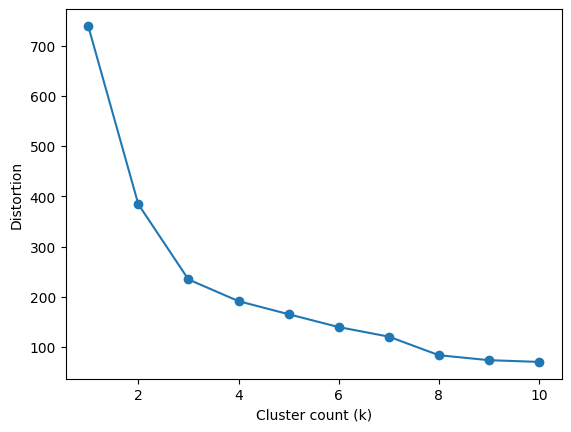

In [149]:
distortions = []

max_k = 10
for i in range(1,max_k+1):
  km = KMeans(n_clusters=i,
              init='random',
              n_init=1,
              max_iter=300,
              random_state=0)
  km.fit(X_embedded)
  # The distortion is called inertia in SciKit
  distortions.append(km.inertia_)

plt.plot(range(1,max_k+1), distortions, marker='o')
plt.xlabel('Cluster count (k)')
plt.ylabel('Distortion')
plt.show()

## Exercise

Go back to the original glass data, re-run PCA *with no losses*, and find the optimal number of clusters.  Use the k-means++ algorithm (see [here](https://scikit-learn.org/1.5/modules/generated/sklearn.cluster.KMeans.html) for the parameters).  Search for up to 15 clusters.

You should select the "elbow" as the point where the slope of the line changes from a steeper to a shallower point.

In [159]:
from sklearn.decomposition import PCA

X_embedded = #TODO

In [ ]:
distortions = []

max_k = 15
# TODO

plt.plot(range(1,max_k+1), distortions, marker='o')
plt.xlabel('Cluster count (k)')
plt.ylabel('Distortion')
plt.show()

In [ ]:
# How many dimensions should we use, to get 95% explained variance ratio?
clusters = # TODO for the number of clusters
clusters

In [ ]:
grader.grade('kmeans', clusters)